In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
orders = pd.read_excel('/content/drive/MyDrive/mindxdataset/orders_dataset.xlsx')
customer = pd.read_excel('/content/drive/MyDrive/mindxdataset/customers_dataset.xlsx')
items = pd.read_excel('/content/drive/MyDrive/mindxdataset/order_items_dataset.xlsx')
payments = pd.read_excel('/content/drive/MyDrive/mindxdataset/order_payments_dataset.xlsx')
reviews = pd.read_excel('/content/drive/MyDrive/mindxdataset/order_reviews_dataset.xlsx')
products = pd.read_excel('/content/drive/MyDrive/mindxdataset/products.xlsx')
product_categories_translate = pd.read_excel('/content/drive/MyDrive/mindxdataset/product_category_name_translation.xlsx')


/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
#Merge data
df_merge = (
    orders.merge(items, on="order_id", how="left")
    .merge(payments, on="order_id", how="outer", validate="m:m")
    .merge(reviews, on="order_id", how="outer")
    .merge(products, on="product_id", how="outer")
    .merge(customer , on="customer_id", how="outer"))

In [ ]:
#kiểm tra số hàng x côt, kiểu dữ liệu, giá trị null
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   product_id                     118318 non-null  object        
 9   order_item_id                  118318 non-null  float64       
 10  seller_id                      118318 non-null  object        
 11  

In [ ]:
#đổi kiểu dữ liệu 
df_merge[['order_item_id']] = df_merge[['order_item_id']].astype(str)

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   product_id                     118318 non-null  object        
 9   order_item_id                  119151 non-null  object        
 10  seller_id                      118318 non-null  object        
 11  

In [ ]:
#xem thống kê cơ bản của các cột lượng số
df_merge.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix
count,118318.000000,118318.000000,119148.000000,119148.000000,119148.000000,119151.000000,116609.000000,116609.000000,116609.000000,118298.000000,118298.000000,118298.000000,118298.000000,119151.000000
mean,120.649109,20.032587,1.094731,2.941426,172.735670,3.998514,48.767402,785.950441,2.205113,2112.302803,30.264865,16.619994,23.074896,35033.953253
std,184.107686,15.836559,0.730117,2.777992,267.770023,1.412529,10.033526,652.571474,1.717418,3786.673988,16.188992,13.453771,11.749216,29823.224176
min,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000
25%,39.900000,13.080000,1.000000,1.000000,60.850000,3.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000
50%,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000
75%,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000
max,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000


In [ ]:
tables = [customer, items, payments, reviews, orders, products, product_categories_translate]
titles = ["customers", "items", "payments", "reviews", "orders", "products", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['Bảng']= titles
data_summary['Tên các cột'] = [', '.join([col for col in data.columns ]) for data in tables]
data_summary['Tổng số hàng']= [data.shape[0] for data in tables]
data_summary['Tổng số cột']= [data.shape[1] for data in tables]
data_summary['Số phần tử Lặp']= [data.duplicated().sum() for data in tables]
data_summary['Số phần tử Null']= [data.isnull().sum().sum() for data in tables]
data_summary['Cột chứa Null'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in tables]
data_summary.style.background_gradient(cmap='Blues')

,Bảng,Tên các cột,Tổng số hàng,Tổng số cột,Số phần tử Lặp,Số phần tử Null,Cột chứa Null
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,items,"order_id, product_id, order_item_id, seller_id, price, freight_value",112650,6,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
3,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",100000,7,0,146543,"review_comment_title, review_comment_message"
4,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


Bảng data summa

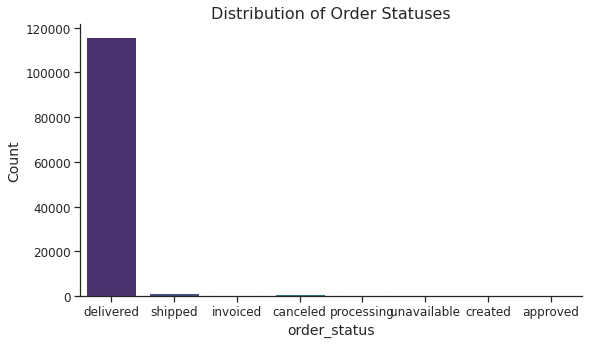

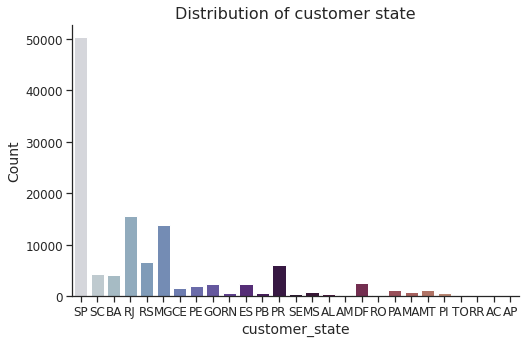

In [ ]:
# Choose Seaborn style
sns.set(style='ticks', font_scale=1.2)

# Distribution of order statuses
plt.figure(figsize=(9, 5))
sns.countplot(x='order_status', data=df_merge, palette='viridis')
plt.title('Distribution of Order Statuses', fontsize=16)
plt.xlabel('order_status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

# Distribution of customer state
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_state', data=df_merge, palette='twilight')
plt.title('Distribution of customer state', fontsize=16)
plt.xlabel('customer_state', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

SP, RJ, MG have biggest number of customers 

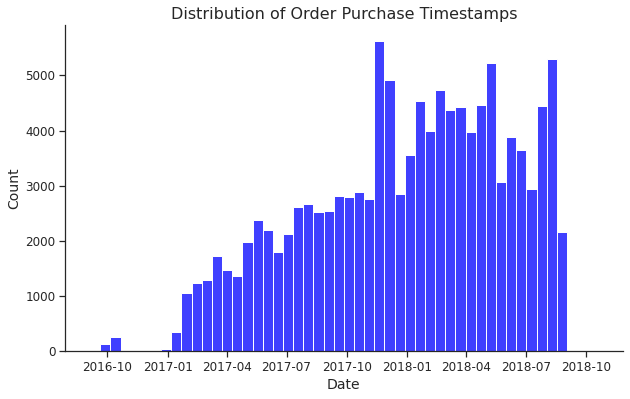

In [ ]:
# Distribution of order purchase timestamps
plt.figure(figsize=(10, 6))
sns.histplot(df_merge['order_purchase_timestamp'], bins=50, kde=False, color='blue')
plt.title('Distribution of Order Purchase Timestamps', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

In [ ]:
pweekday = df_merge['order_purchase_timestamp'].dt.weekday
phour = df_merge['order_purchase_timestamp'].dt.hour
pprice = df_merge['price']
purchase = pd.DataFrame({'day of week': pweekday, 'hour': phour, 'price': pprice})
purchase['day of week'] = purchase['day of week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
purchase.head()

,day of week,hour,price
0,Mon,10,29.99
1,Mon,10,29.99
2,Mon,10,29.99
3,Tue,18,29.99
4,Wed,18,29.99


<Axes: xlabel='hour', ylabel='day of week'>

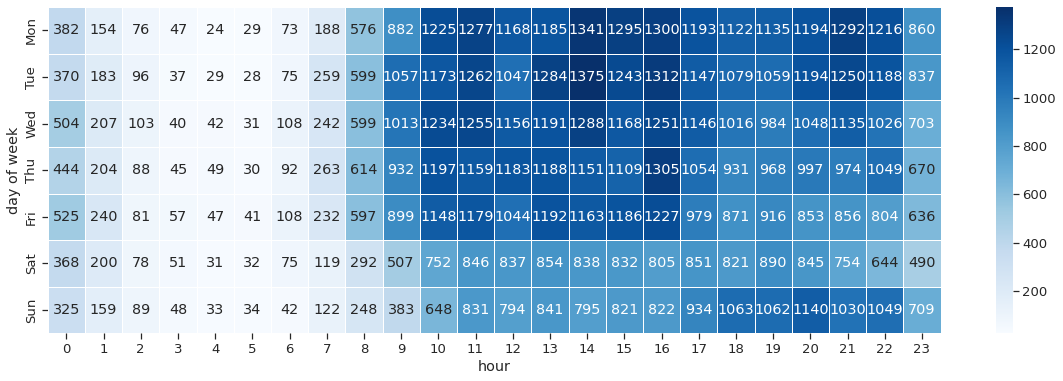

In [ ]:
purchase_count = purchase.groupby(['day of week', 'hour']).count()['price'].unstack()
plt.figure(figsize=(20,6))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), 
            cmap="Blues", annot=True, fmt="d", linewidths=0.5)

Rush hours of this e-commerce web are from 9h to 22h .
Rush days are from Monday to Friday. Customers ordered more on the weekdays than at the weekends


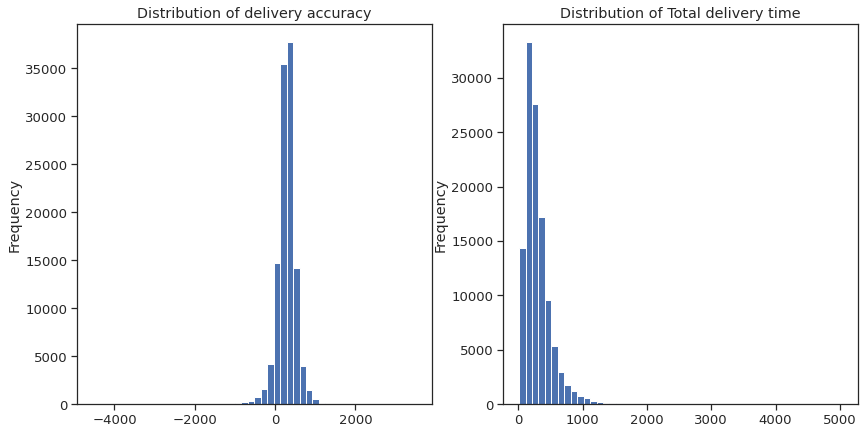

In [ ]:
#Biểu đồ histogram thể hiện phân bố độ trễ giữa thời gian giao hàng thực tế so với thời gian giao hàng dự kiến theo giờ
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
((df_merge['order_estimated_delivery_date'] - df_merge['order_delivered_customer_date']) / (np.timedelta64(1, 'h'))).plot(kind='hist', bins=50)
plt.title ('Distribution of delivery accuracy')
#Biểu đồ histogram thể hiện phân bố tổng số thời gian giao hàng theo ngày (kể từ thời điểm đơn hàng được mua cho đến thời điểm khách nhận hàng theo GIỜ)
plt.subplot(1, 2, 2)
((df_merge['order_delivered_customer_date'] - df_merge['order_purchase_timestamp']) / (np.timedelta64(1, 'h'))).plot(kind='hist', bins=50)
plt.title('Distribution of Total delivery time')
plt.show()

In [ ]:

df_merge['delivery_accuracy'] = ((df_merge['order_estimated_delivery_date'] - df_merge['order_delivered_customer_date'])/(np.timedelta64(1, 'h')))
df_merge['tot_delivery_time'] = ((df_merge['order_delivered_customer_date'] - df_merge['order_purchase_timestamp'])/(np.timedelta64(1, 'h')))

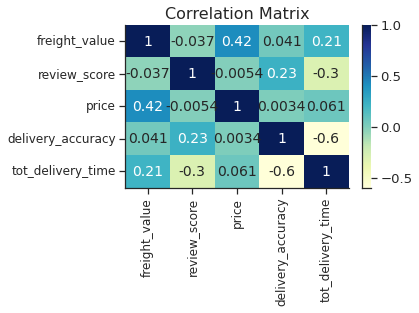

In [ ]:
# Correlation matrix tính hệ số tương quan giữa 1 số giá trị
corr_matrix = df_merge[[ 'freight_value', 'review_score','price','delivery_accuracy','tot_delivery_time']].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', annot_kws={'size': 14})
plt.title('Correlation Matrix', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

**The nearer correlation coefficient of 2 values to 1 or -1, the better relationship of the values is**
The couple of value is worth to consider:
 Total delivery time & deliverry accuracy (-0.6)

